In [1]:
import pandas as pd
import sklearn
from matplotlib import pyplot as plt

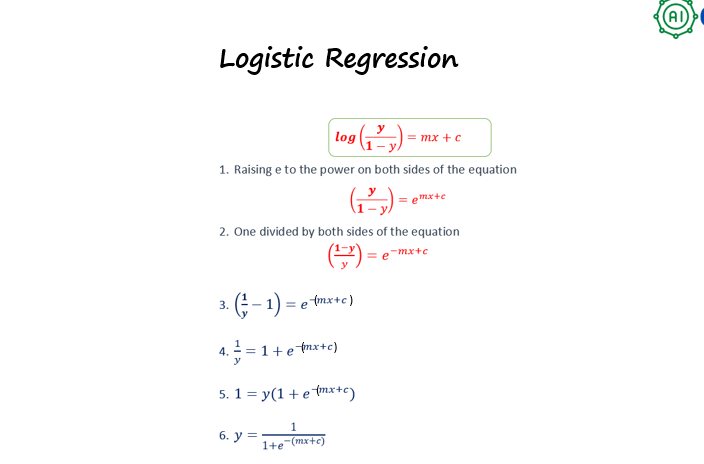

In [2]:
from IPython.display import Image
Image('logit.png')

In [2]:
df = pd.read_csv('shoe.csv')

In [3]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


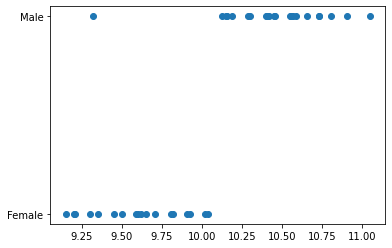

In [4]:
plt.scatter(df['size(cm)'], df['class(y)'])

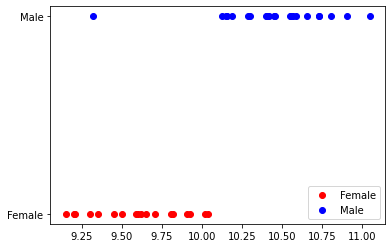

In [5]:
df0 = df[df['class(y)'] == 'Female']
df1 = df[df['class(y)'] == 'Male']

plt.scatter(df0['size(cm)'], df0['class(y)'], color='red', label='Female')
plt.scatter(df1['size(cm)'], df1['class(y)'], color='blue', label='Male')

plt.legend()


In [6]:
#preprocessing
df['class(y)'] = df['class(y)'].replace(['Male', 'Female'], [1,0])

In [7]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
xtrain,xtest,ytrain,ytest = train_test_split(df[['size(cm)']], df['class(y)'], test_size=.30)

In [10]:
xtrain.head()

,size(cm)
10,9.82
7,10.57
22,9.20
29,10.73
15,10.73


In [11]:
ytrain.head()

10    0
7     1
22    0
29    1
15    1
Name: class(y), dtype: int64

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
reg = LogisticRegression()

In [14]:
reg.fit(xtrain, ytrain)

LogisticRegression()

In [15]:
reg.coef_

array([[2.06824134]])

In [16]:
reg.intercept_

array([-20.5021773])

In [17]:
reg.predict_proba(xtest)

array([[0.19773702, 0.80226298],
       [0.36049832, 0.63950168],
       [0.76208068, 0.23791932],
       [0.267463  , 0.732537  ],
       [0.25943688, 0.74056312],
       [0.24386095, 0.75613905],
       [0.66099756, 0.33900244],
       [0.72258022, 0.27741978],
       [0.65634774, 0.34365226],
       [0.13522707, 0.86477293],
       [0.55298279, 0.44701721],
       [0.6033765 , 0.3966235 ]])

In [18]:
reg.predict(xtest)

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [19]:
ytest

19    1
12    1
21    0
32    1
11    1
25    1
33    0
6     0
38    0
27    1
3     0
8     0
Name: class(y), dtype: int64

In [20]:
logit = reg.score(xtest, ytest)
logit

1.0

In [ ]:
#KNN Classifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn_cls_obj = KNeighborsClassifier(n_neighbors=10)

In [25]:
knn_cls_obj.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=10)

In [26]:
pred = knn_cls_obj.predict(xtest)

In [29]:
logit2 = knn_cls_obj.score(xtest, ytest)
logit2

1.0

In [ ]:
# Make Visualization for KNN & Logistic Reg like-

In [30]:
import seaborn as sns

In [39]:
data = {
    'Algorithm Name' : ['Logistic Regression', 'KNN classifier'],
    'Accuracy': [logit, logit2]
}

In [40]:
data

{'Algorithm Name': ['Logistic Regression', 'KNN classifier'],
 'Accuracy': [1.0, 1.0]}

In [41]:
accuracy_df = pd.DataFrame(data, columns=['Algorithm Name', 'Accuracy'])

In [42]:
accuracy_df

,Algorithm Name,Accuracy
0,Logistic Regression,1.0
1,KNN classifier,1.0


<AxesSubplot:xlabel='Accuracy', ylabel='Algorithm Name'>

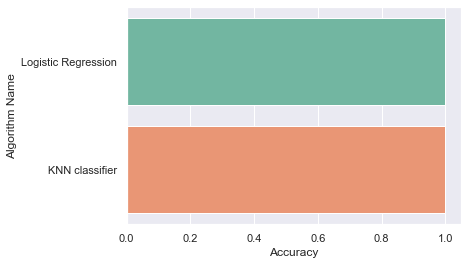

In [45]:
sns.set()
sns.barplot(y = "Algorithm Name", x = "Accuracy", data=accuracy_df, palette="Set2")
# sns.set(rc = {'figure.figsize':(15:5)})

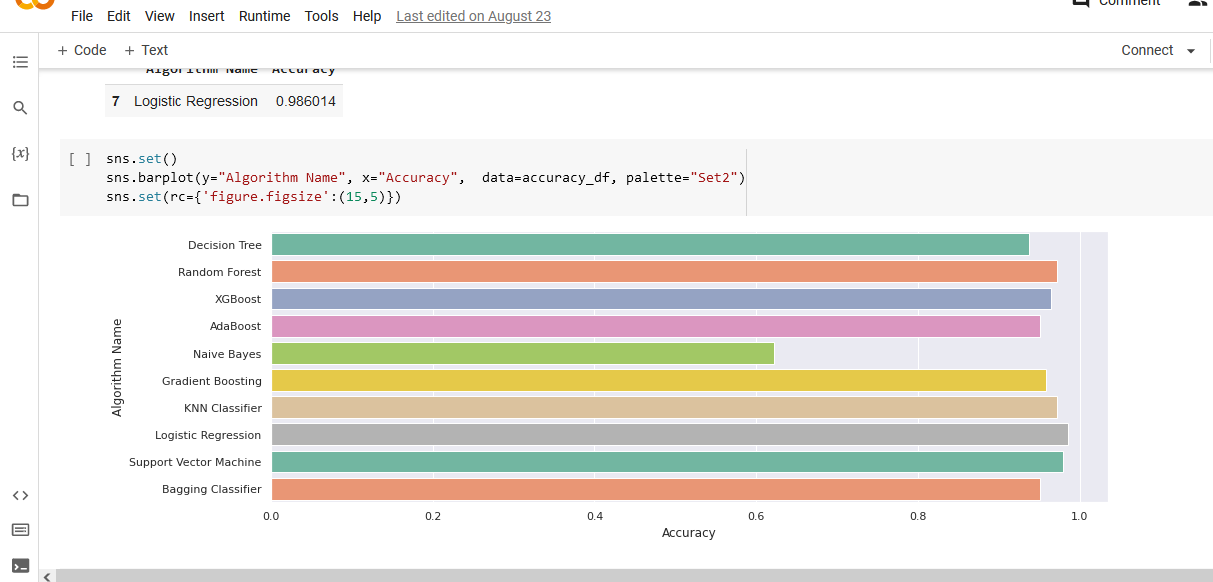

In [31]:
Image('acc.png')